In [1]:
import pandas as pd
import pymongo
import regex as re
from nltk.tokenize import WordPunctTokenizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import plotly

In [2]:
myclient = pymongo.MongoClient('mongodb://localhost:27017/')
mydb = myclient["tweets"]
mycol = mydb["ministries_tweets"]
mydoc = mycol.find().sort("created_at", -1)

In [3]:
df =  pd.DataFrame(list(mydoc))

In [4]:
df.head()

,_id,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,631c54bd78cba369d77affc8,2022-09-10 09:07:14,1568526501754343426,1568526501754343426,@rajnathsingh @adgpi @PIB_India @indiannavy @I...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1568526485979529217,1568526485979529217,...,1,False,False,qam,NaN,NaN,NaN,NaN,NaN,NaN
1,631c54bd78cba369d77affc9,2022-09-10 09:07:10,1568526485979529217,1568526485979529217,"On 10th September 1965, Company Quartermaster ...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",None,None,...,15,False,False,en,False,NaN,NaN,NaN,NaN,NaN
2,631c54bd78cba369d77affca,2022-09-10 09:02:58,1568525429061079040,1568525429061079040,Daily weather Video (English) Dated 10-09-2022...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,...,4,False,False,en,False,NaN,NaN,NaN,NaN,NaN
3,631c54bd78cba369d77affcb,2022-09-10 08:59:50,1568524639563038721,1568524639563038721,The government approved the #Kochi Metro Rail ...,True,"{'hashtags': [{'text': 'Kochi', 'indices': [28...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,...,18,False,False,en,False,NaN,NaN,NaN,NaN,NaN
4,631c54bd78cba369d77affcc,2022-09-10 08:58:33,1568524317331456000,1568524317331456000,Follow these guidelines to manage symptoms of ...,True,"{'hashtags': [{'text': 'Monkeypox', 'indices':...","<a href=""http://twitter.com/download/android"" ...",None,None,...,13,False,False,en,False,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['_id', 'created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'lang', 'possibly_sensitive',
       'retweeted_status', 'extended_entities', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [6]:
tweets=df['text']

In [7]:
pd.options.display.max_colwidth = 200

In [8]:
tweets

0             @rajnathsingh @adgpi @PIB_India @indiannavy @IAF_MCC @drajaykumar_ias @AjaybhattBJP4UK @PIBHindi @DIAV20 @KSBSectt @secyesw @salute2soldier
1            On 10th September 1965, Company Quartermaster Havildar Abdul Hameed of the Grenadiers destroyed an enemy tank despi… https://t.co/RoXz979RsV
2                      Daily weather Video (English) Dated 10-09-2022:\n\nFacebook link: https://t.co/ih5JrKZWNe\n\nYoutube link: https://t.co/RmNlzVSMOy
3                 The government approved the #Kochi Metro Rail Project Phase II on Wednesday.\n\n@RailMinIndia @AshwiniVaishnaw… https://t.co/DyqGFyDhLL
4                               Follow these guidelines to manage symptoms of #Monkeypox at home.\n\nFor more information, visit… https://t.co/iYKmPTvnN7
                                                                               ...                                                                       
18925       The Dekho Apna Desh webinars have been narrating interesting tra

In [9]:
a = tweets.loc[1272]

In [10]:
print(a)

Today, Hon’ble MoS for Education Shri @RanjanRajkuma11 addressed the Future Ready Education Summit organised by ET… https://t.co/QpKLIPvvT6


In [11]:
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
a = re.sub(regex_pattern,'',a) #replaces pattern with ''
print(a)

Today, Hon’ble MoS for Education Shri @RanjanRajkuma11 addressed the Future Ready Education Summit organised by ET… https://t.co/QpKLIPvvT6


In [12]:
pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
a = re.sub(pattern,'',a)
print(a)

Today, Hon’ble MoS for Education Shri @RanjanRajkuma11 addressed the Future Ready Education Summit organised by ET… 


In [13]:
re_list = ['@[A-Za-z0–9_]+', '#']
combined_re = re.compile( '|'.join( re_list) )
a = re.sub(combined_re,'',a)
print(a)

Today, Hon’ble MoS for Education Shri 11 addressed the Future Ready Education Summit organised by ET… 


In [14]:
def cleaning_tweets(t):
    token = WordPunctTokenizer()
    regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
    re_list = ['@[A-Za-z0–9_]+', '#']
    combined_re = re.compile( '|'.join( re_list) )
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link=re.sub(combined_re, '', del_amp_text)
    del_mentions = re.sub(pattern, '', del_link)
    del_emoticons = re.sub(regex_pattern, '', del_link)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [ ]:
print("Cleaning the tweets...\n")
cleaned_tweets = []
for idx,tweet in enumerate(tweets): #3000 columns in our dataframe
    if( (idx+1)%100 == 0 ):
        print("Tweets {} of {} have ben processed".format(idx+1,len(tweets)))                                                                  
    cleaned_tweets.append(cleaning_tweets((tweet)))

In [16]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

In [17]:
stopwords = set(STOPWORDS)
stopwords.update(["https"])

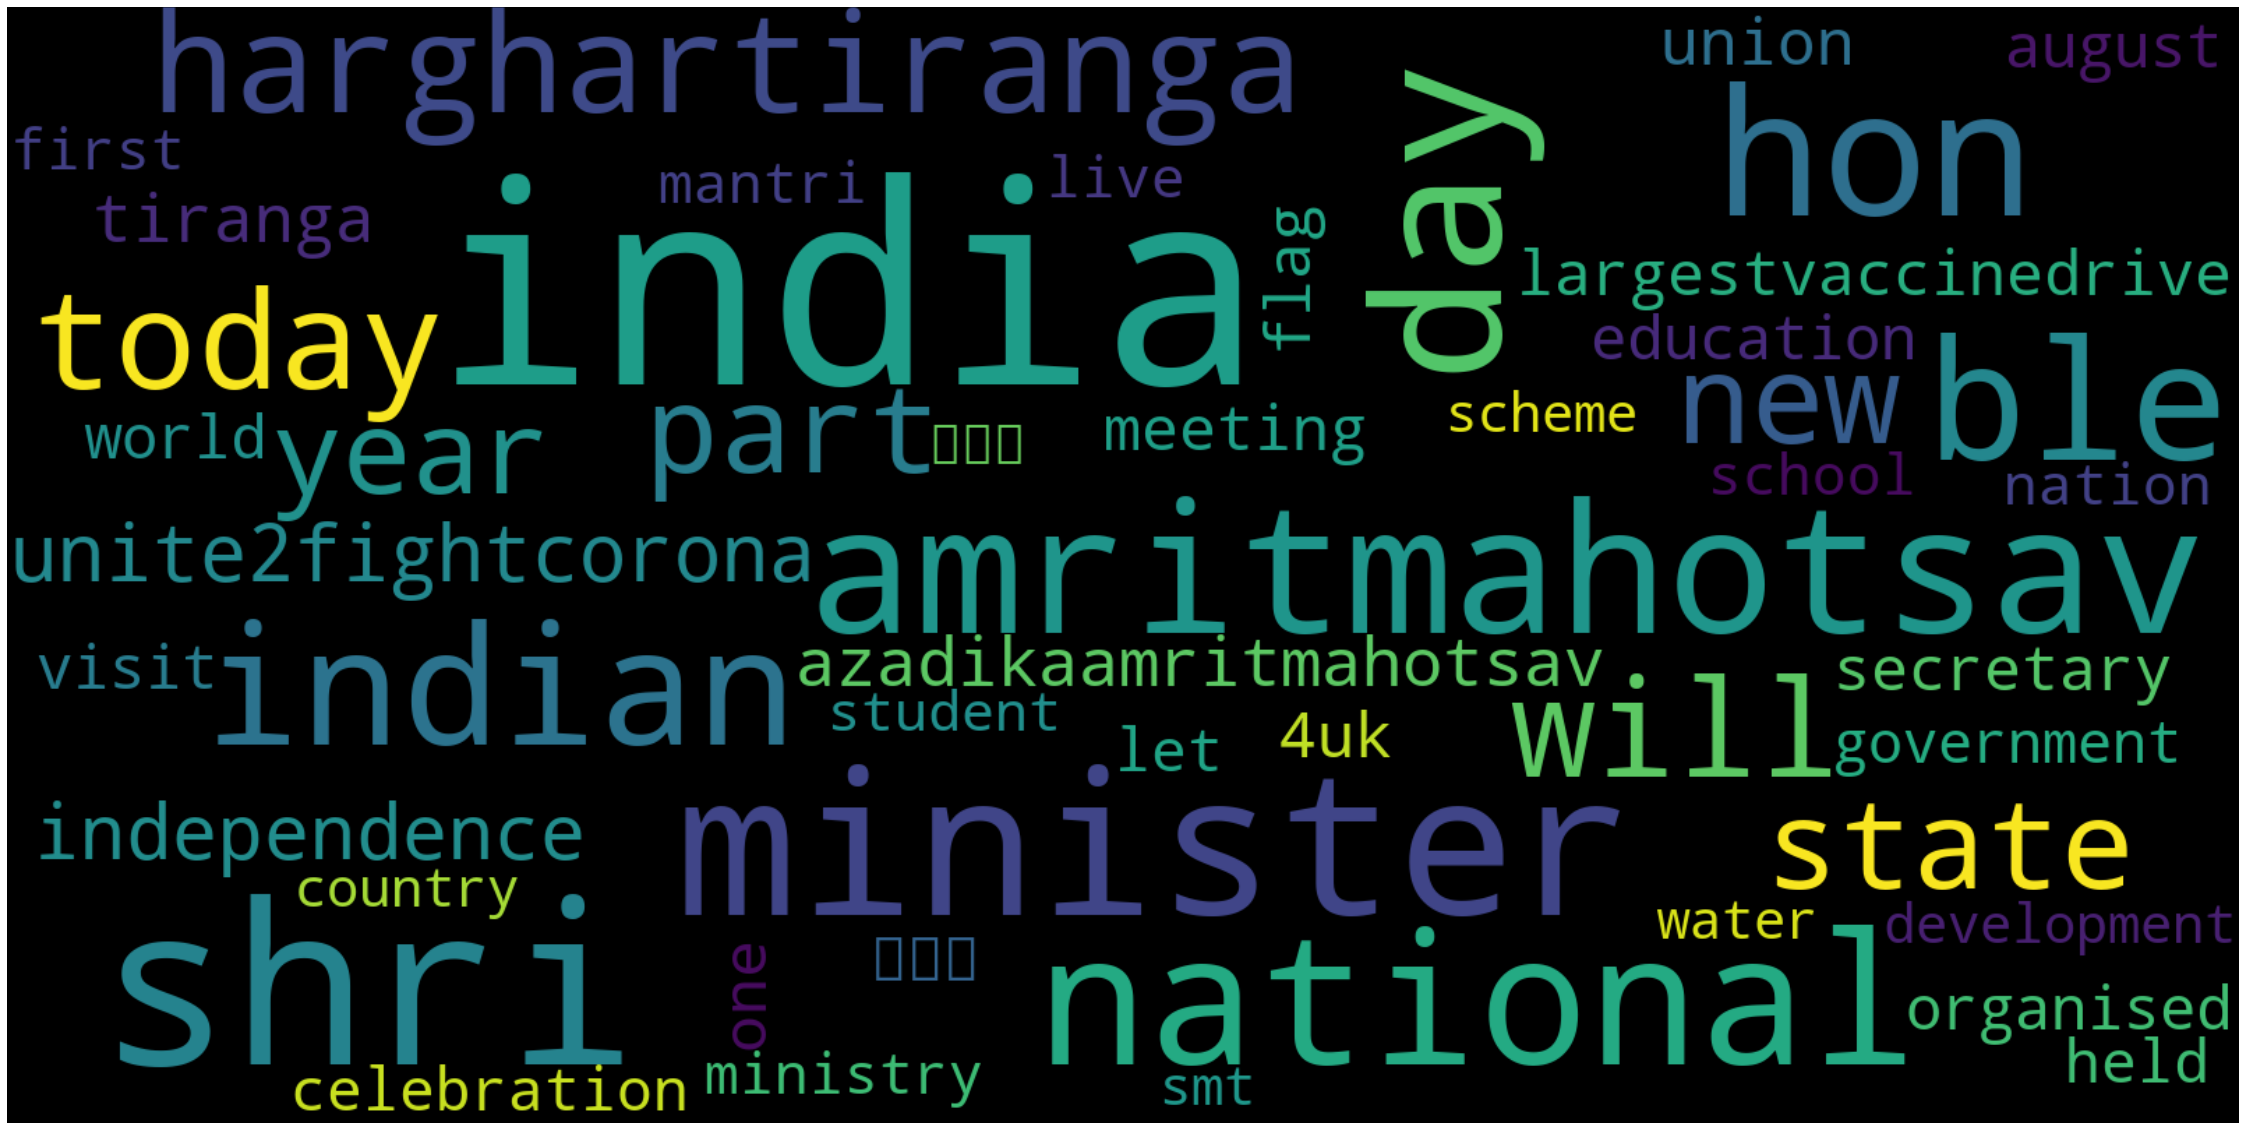

In [18]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
df.head()

,_id,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,631c54bd78cba369d77affc8,2022-09-10 09:07:14,1568526501754343426,1568526501754343426,@rajnathsingh @adgpi @PIB_India @indiannavy @IAF_MCC @drajaykumar_ias @AjaybhattBJP4UK @PIBHindi @DIAV20 @KSBSectt @secyesw @salute2soldier,False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'rajnathsingh', 'name': 'Rajnath Singh', 'id': 1346439824, 'id_str': '1346439824', 'indices': [0, 13]}, {'screen_name': 'adgpi', '...","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",1568526485979529217,1568526485979529217,...,1,False,False,qam,NaN,NaN,NaN,NaN,NaN,NaN
1,631c54bd78cba369d77affc9,2022-09-10 09:07:10,1568526485979529217,1568526485979529217,"On 10th September 1965, Company Quartermaster Havildar Abdul Hameed of the Grenadiers destroyed an enemy tank despi… https://t.co/RoXz979RsV",True,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/RoXz979RsV', 'expanded_url': 'https://twitter.com/i/web/status/1568526485979529217', 'display_url': 'twitter.com...","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,None,...,15,False,False,en,False,NaN,NaN,NaN,NaN,NaN
2,631c54bd78cba369d77affca,2022-09-10 09:02:58,1568525429061079040,1568525429061079040,Daily weather Video (English) Dated 10-09-2022:\n\nFacebook link: https://t.co/ih5JrKZWNe\n\nYoutube link: https://t.co/RmNlzVSMOy,False,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ih5JrKZWNe', 'expanded_url': 'https://fb.watch/fs34NA78tA/', 'display_url': 'fb.watch/fs34NA78tA/', 'indices': [...","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",None,None,...,4,False,False,en,False,NaN,NaN,NaN,NaN,NaN
3,631c54bd78cba369d77affcb,2022-09-10 08:59:50,1568524639563038721,1568524639563038721,The government approved the #Kochi Metro Rail Project Phase II on Wednesday.\n\n@RailMinIndia @AshwiniVaishnaw… https://t.co/DyqGFyDhLL,True,"{'hashtags': [{'text': 'Kochi', 'indices': [28, 34]}], 'symbols': [], 'user_mentions': [{'screen_name': 'RailMinIndia', 'name': 'Ministry of Railways', 'id': 2602959463, 'id_str': '2602959463', 'i...","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",None,None,...,18,False,False,en,False,NaN,NaN,NaN,NaN,NaN
4,631c54bd78cba369d77affcc,2022-09-10 08:58:33,1568524317331456000,1568524317331456000,"Follow these guidelines to manage symptoms of #Monkeypox at home.\n\nFor more information, visit… https://t.co/iYKmPTvnN7",True,"{'hashtags': [{'text': 'Monkeypox', 'indices': [46, 56]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/iYKmPTvnN7', 'expanded_url': 'https://twitter.com/i/web/status/1568524...","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,None,...,13,False,False,en,False,NaN,NaN,NaN,NaN,NaN


In [20]:
df['created_at']=pd.to_datetime(df['created_at'])

In [21]:
print(type(df['created_at'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [22]:
df['user'][0]

{'id': 3016185331,
 'id_str': '3016185331',
 'name': 'A. Bharat Bhushan Babu',
 'screen_name': 'SpokespersonMoD',
 'location': 'New Delhi',
 'description': 'Principal Spokesperson, Ministry of Defence, Government of India',
 'url': 'https://t.co/58OeoIRmZ9',
 'entities': {'url': {'urls': [{'url': 'https://t.co/58OeoIRmZ9',
     'expanded_url': 'http://www.mod.nic.in/',
     'display_url': 'mod.nic.in',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 465689,
 'friends_count': 119,
 'listed_count': 830,
 'created_at': 'Tue Feb 10 06:13:29 +0000 2015',
 'favourites_count': 122,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 95229,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_